<a href="https://colab.research.google.com/github/Kottancheril/Chronic_kidney_disease_prediction/blob/main/chronic_kidney_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install ucimlrepo

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc

In [3]:
# fetch dataset
chronic_kidney_disease = fetch_ucirepo(id=336)

# data
X = chronic_kidney_disease.data.features
y = chronic_kidney_disease.data.targets


In [4]:
# Save the targets and features as distinct CSV files
X.to_csv('chronic_kidney_disease_features.csv', index=False)
y.to_csv('chronic_kidney_disease_targets.csv', index=False)

In [5]:
# Load the features and targets CSV files
features = pd.read_csv('chronic_kidney_disease_features.csv')
targets = pd.read_csv('chronic_kidney_disease_targets.csv')

# Combine the features and targets into a single DataFrame
combined = pd.concat([features, targets], axis=1)

# Save the merged DataFrame as a new CSV file
combined.to_csv('chronic_kidney_disease_combined.csv', index=False)

print("CSV files combined and saved as 'chronic_kidney_disease_combined.csv'.")


CSV files combined and saved as 'chronic_kidney_disease_combined.csv'.


In [6]:
# Load the merged CSV file
combined_data = pd.read_csv('chronic_kidney_disease_combined.csv')

In [7]:
# Print metadata and variable information
print("Metadata:")
print(chronic_kidney_disease.metadata)

print("\nVariables:")
print(chronic_kidney_disease.variables)

Metadata:
{'uci_id': 336, 'name': 'Chronic Kidney Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/336/data.csv', 'abstract': 'This dataset can be used to predict the chronic kidney disease and it can be collected from the hospital nearly 2 months of period.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 400, 'num_features': 24, 'feature_types': ['Real'], 'demographics': ['Age'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2015, 'last_updated': 'Mon Mar 04 2024', 'dataset_doi': '10.24432/C5G020', 'creators': ['L. Rubini', 'P. Soundarapandian', 'P. Eswaran'], 'intro_paper': None, 'additional_info': {'summary': 'We use the following representation to collect the dataset\r\n                        age\t\t-\tage\t\r\n\t\t\tbp\t\t-\tblood pressure\r\n

In [8]:
combined_data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [9]:
combined_data.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [10]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wbcc    294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     398 non-null    object 
 19  dm      398 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null    object 
 22  pe

In [11]:
# Extract and then print categorical variables and numerical variables
categorical_cols = combined_data.select_dtypes(include=['object']).columns
numerical_cols = combined_data.select_dtypes(include=
 ['float64', 'int64']).columns

print("Categorical Columns:")
print(categorical_cols)

print("\nNumerical Columns:")
print(numerical_cols)

Categorical Columns:
Index(['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
       'class'],
      dtype='object')

Numerical Columns:
Index(['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo',
       'pcv', 'wbcc', 'rbcc'],
      dtype='object')


In [12]:
# Check unique values of each categorical column
for col in categorical_cols:
    print(f"Unique values in '{col}':")
    print(combined_data[col].unique())
    print()

Unique values in 'rbc':
[nan 'normal' 'abnormal']

Unique values in 'pc':
['normal' 'abnormal' nan]

Unique values in 'pcc':
['notpresent' 'present' nan]

Unique values in 'ba':
['notpresent' 'present' nan]

Unique values in 'htn':
['yes' 'no' nan]

Unique values in 'dm':
['yes' 'no' '\tno' nan]

Unique values in 'cad':
['no' 'yes' nan]

Unique values in 'appet':
['good' 'poor' nan]

Unique values in 'pe':
['no' 'yes' nan]

Unique values in 'ane':
['no' 'yes' nan]

Unique values in 'class':
['ckd' 'ckd\t' 'notckd']



In [13]:
# Replace incorrect values in 'dm' and 'class' columns as there's some
 #ambiguity present
combined_data['dm'] = combined_data['dm'].replace('\tno', 'no')
combined_data['class'] = combined_data['class'].replace('ckd\t', 'ckd')

# Replace 'ckd' with 1 and 'notckd' with 0 in the 'class' column
combined_data['class'] = combined_data['class'].replace({'ckd': 1,
                                                        'notckd': 0})

# Check for unique values in 'dm' and 'class' after replacement
print("Unique values in 'dm' after replacement:")
print(combined_data['dm'].unique())

# Check the unique values in 'class' after the conversion
print("Unique values in 'class' after conversion:")
print(combined_data['class'].unique())


Unique values in 'dm' after replacement:
['yes' 'no' nan]
Unique values in 'class' after conversion:
[1 0]


<ipython-input-13-d59c1d94bdd5>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  combined_data['class'] = combined_data['class'].replace({'ckd': 1,


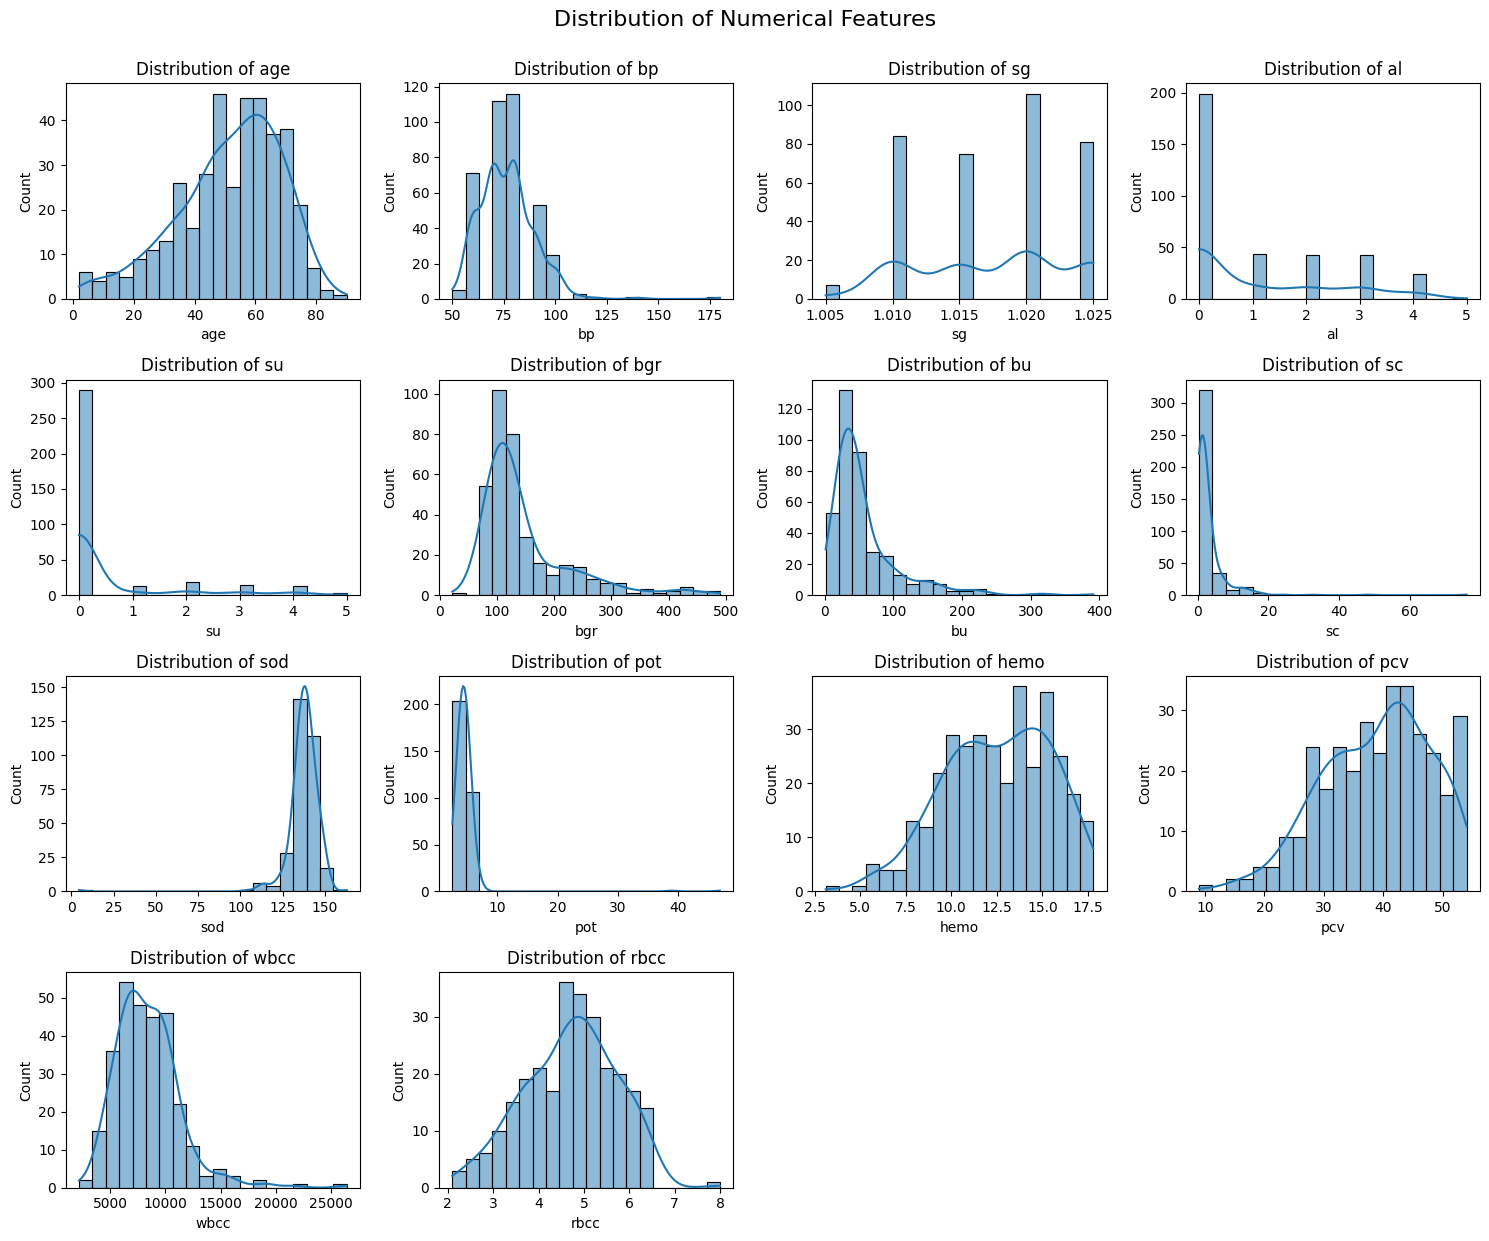

In [14]:
# Plot the distribution of numerical features
numerical_features = combined_data[numerical_cols]

plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i)
    sns.histplot(numerical_features[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.suptitle('Distribution of Numerical Features',
             fontsize=16, y=1.03)
plt.show()


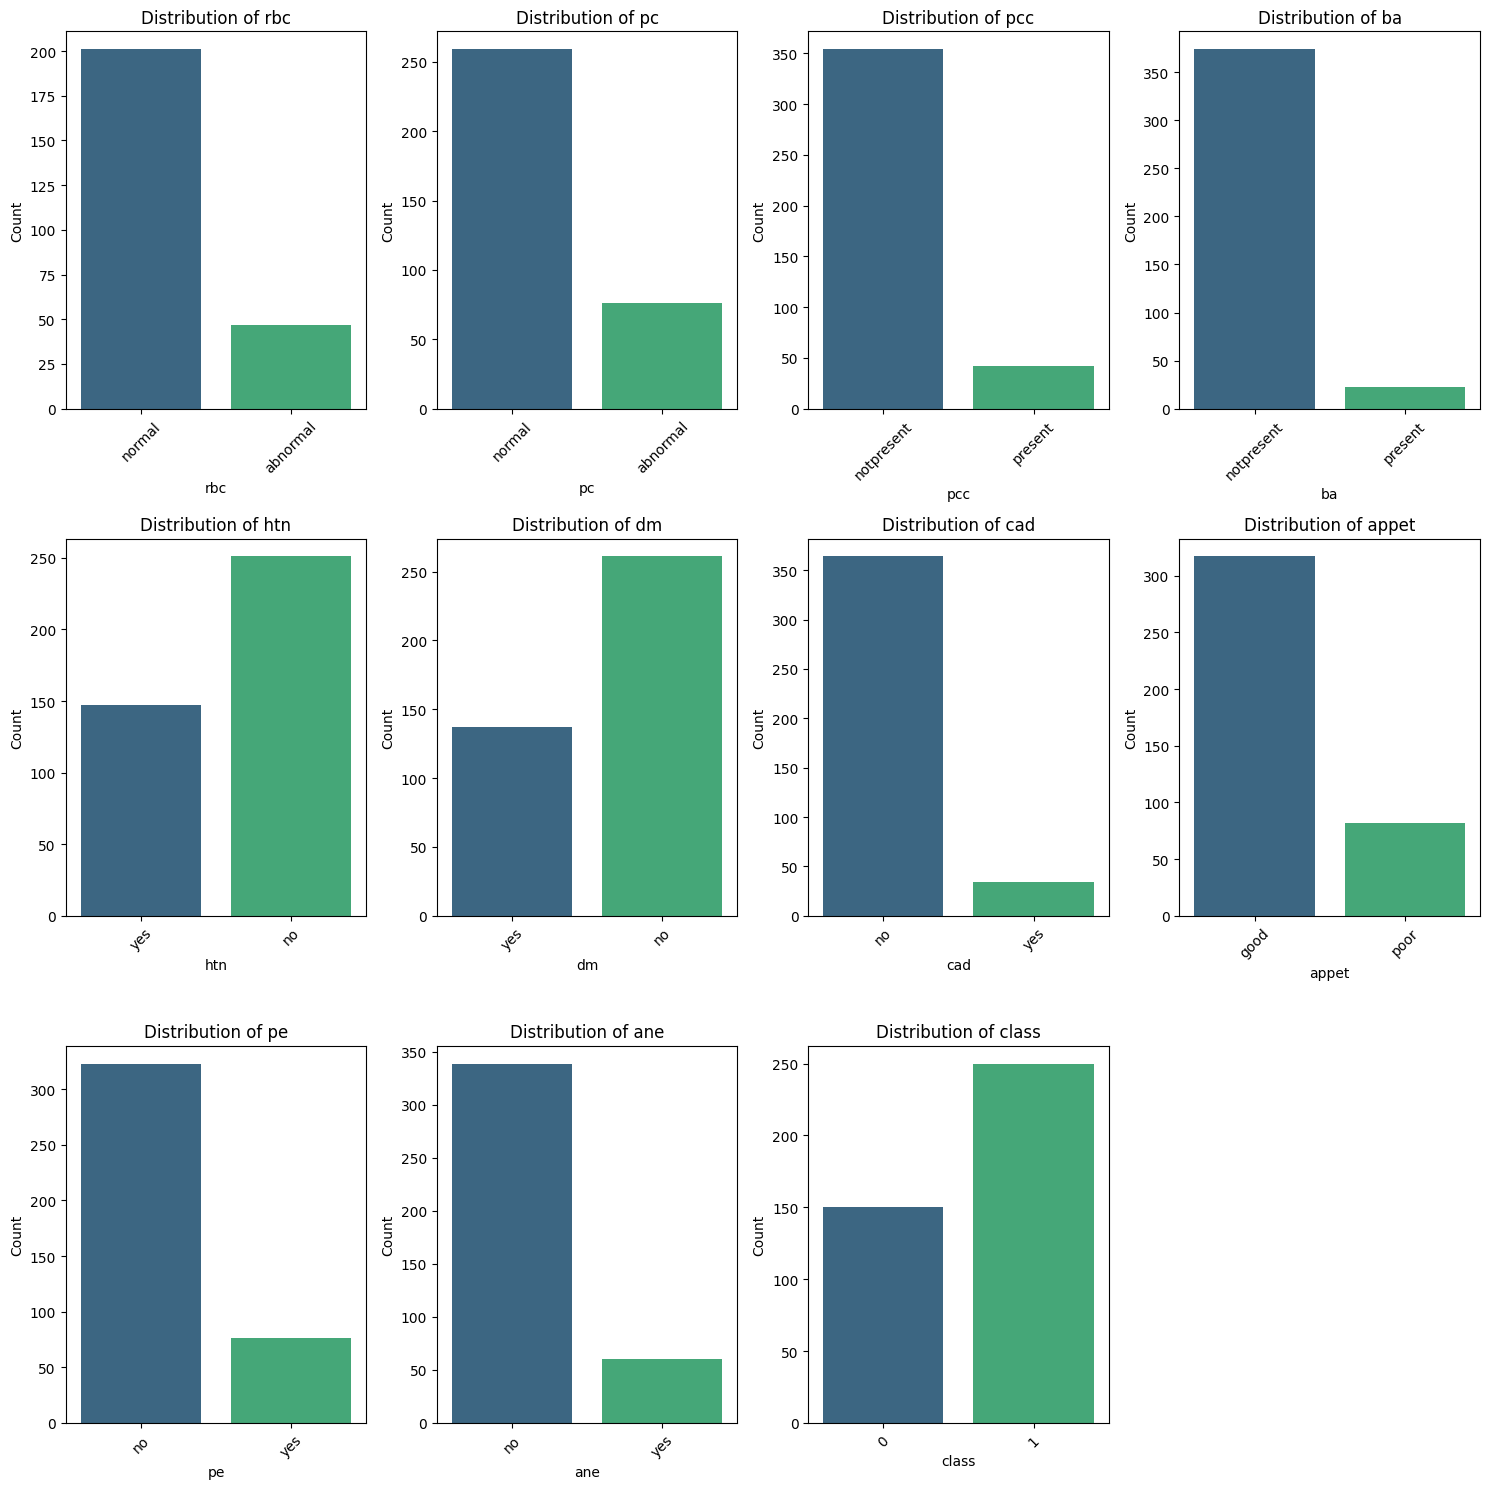

In [15]:
# Plotting the distribution of categorical features
n_cols = 4
n_rows = (len(categorical_cols) // n_cols) + (
    1 if len(categorical_cols) % n_cols != 0 else 0)

# Create a figure with subplots
plt.figure(figsize=(15, 5 * n_rows))

for i, column in enumerate(categorical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(data=combined_data, x=column, hue=column,
                  palette='viridis', legend=False)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


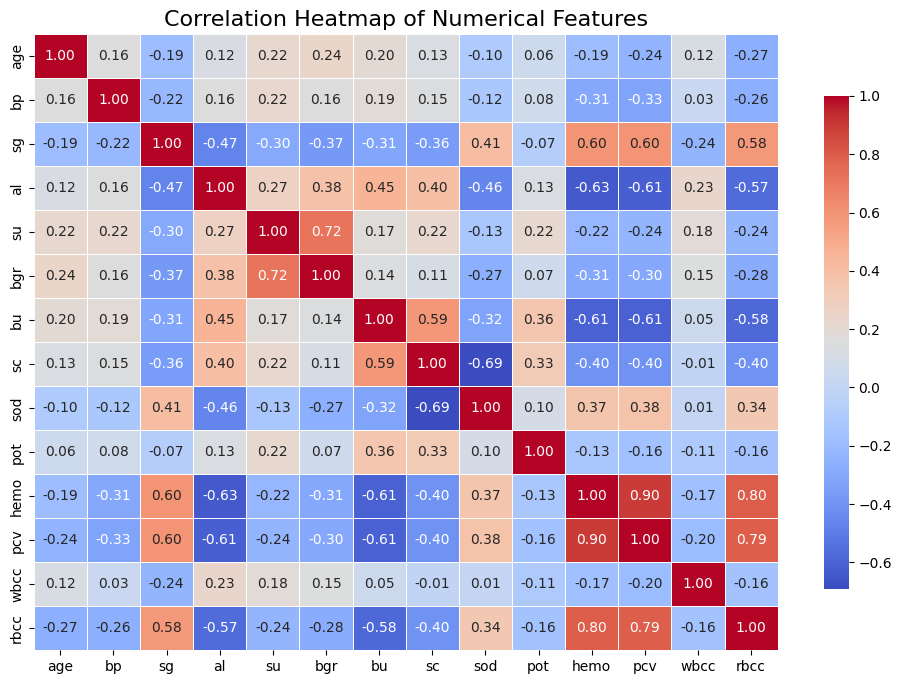

In [16]:
# Calculate the correlation matrix for numerical features
correlation_matrix = combined_data[numerical_cols].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f',
            linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.show()

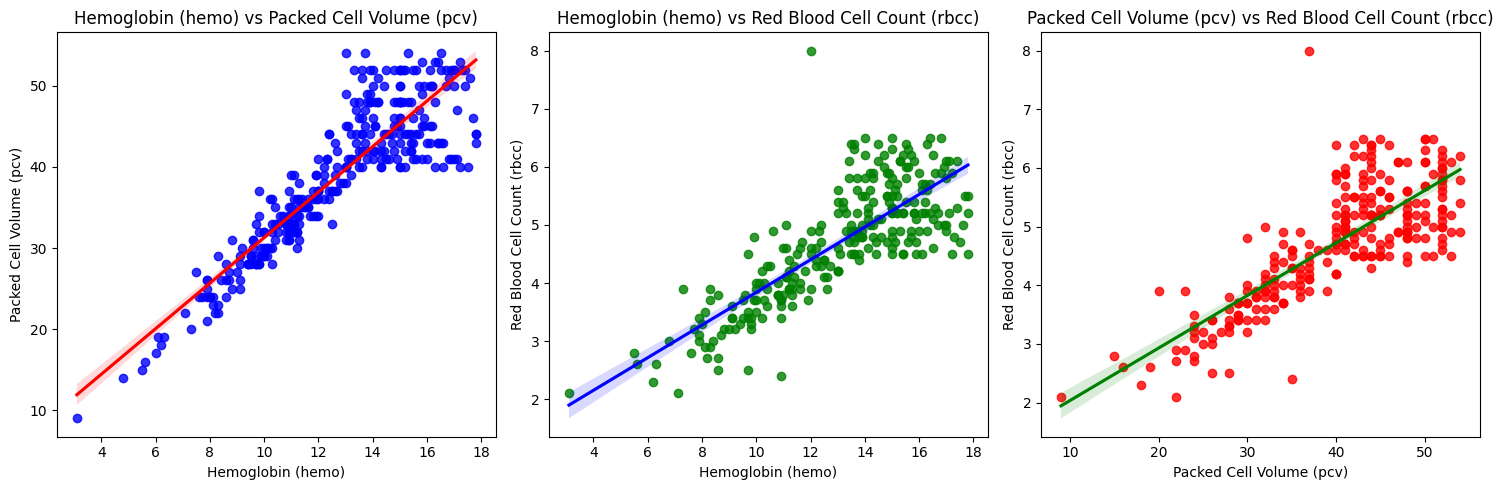

In [17]:
plt.figure(figsize=(15, 5))

# Scatter plot for hemo vs pcv with regression line
plt.subplot(1, 3, 1)
sns.regplot(x=combined_data['hemo'], y=combined_data['pcv'], scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Hemoglobin (hemo) vs Packed Cell Volume (pcv)')
plt.xlabel('Hemoglobin (hemo)')
plt.ylabel('Packed Cell Volume (pcv)')

# Scatter plot for hemo vs rbcc with regression line
plt.subplot(1, 3, 2)
sns.regplot(x=combined_data['hemo'], y=combined_data['rbcc'], scatter_kws={'color': 'green'}, line_kws={'color': 'blue'})
plt.title('Hemoglobin (hemo) vs Red Blood Cell Count (rbcc)')
plt.xlabel('Hemoglobin (hemo)')
plt.ylabel('Red Blood Cell Count (rbcc)')

# Scatter plot for pcv vs rbcc with regression line
plt.subplot(1, 3, 3)
sns.regplot(x=combined_data['pcv'], y=combined_data['rbcc'], scatter_kws={'color': 'red'}, line_kws={'color': 'green'})
plt.title('Packed Cell Volume (pcv) vs Red Blood Cell Count (rbcc)')
plt.xlabel('Packed Cell Volume (pcv)')
plt.ylabel('Red Blood Cell Count (rbcc)')

plt.tight_layout()
plt.show()

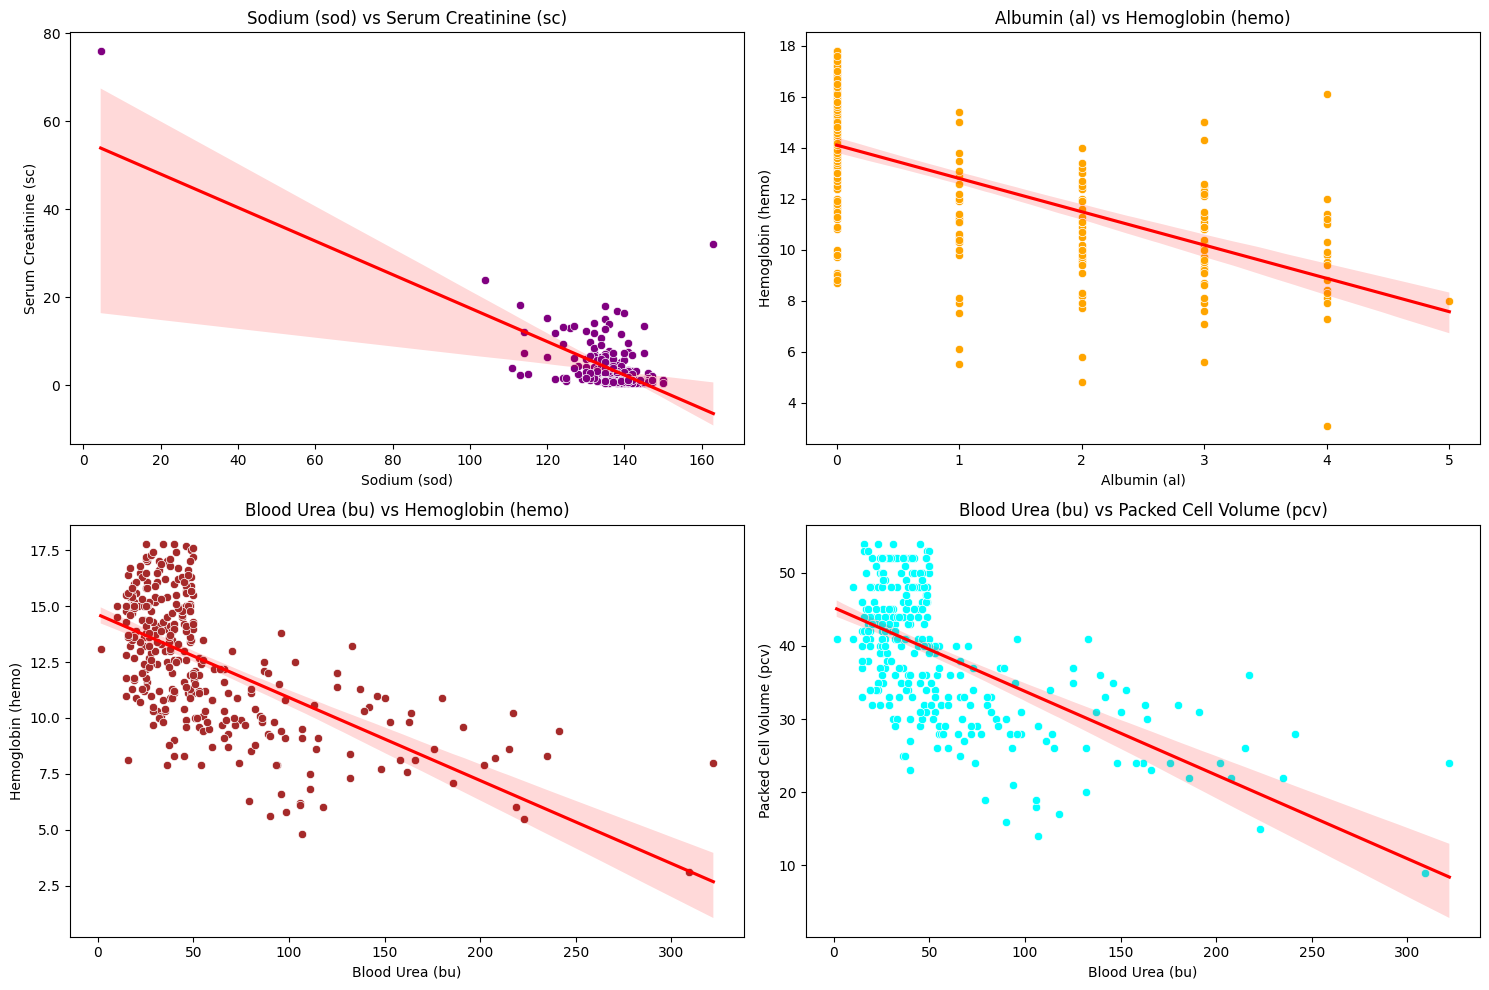

In [18]:
plt.figure(figsize=(15, 10))

# Scatter plot for sod vs sc
plt.subplot(2, 2, 1)
sns.scatterplot(x=combined_data['sod'], y=combined_data['sc'], color='purple')
sns.regplot(x=combined_data['sod'], y=combined_data['sc'], scatter=False, color='purple', line_kws={'color': 'red'})
plt.title('Sodium (sod) vs Serum Creatinine (sc)')
plt.xlabel('Sodium (sod)')
plt.ylabel('Serum Creatinine (sc)')

# Scatter plot for al vs hemo
plt.subplot(2, 2, 2)
sns.scatterplot(x=combined_data['al'], y=combined_data['hemo'], color='orange')
sns.regplot(x=combined_data['al'], y=combined_data['hemo'], scatter=False, color='orange', line_kws={'color': 'red'})
plt.title('Albumin (al) vs Hemoglobin (hemo)')
plt.xlabel('Albumin (al)')
plt.ylabel('Hemoglobin (hemo)')

# Scatter plot for bu vs hemo
plt.subplot(2, 2, 3)
sns.scatterplot(x=combined_data['bu'], y=combined_data['hemo'], color='brown')
sns.regplot(x=combined_data['bu'], y=combined_data['hemo'], scatter=False, color='brown', line_kws={'color': 'red'})
plt.title('Blood Urea (bu) vs Hemoglobin (hemo)')
plt.xlabel('Blood Urea (bu)')
plt.ylabel('Hemoglobin (hemo)')

# Scatter plot for bu vs pcv
plt.subplot(2, 2, 4)
sns.scatterplot(x=combined_data['bu'], y=combined_data['pcv'], color='cyan')
sns.regplot(x=combined_data['bu'], y=combined_data['pcv'], scatter=False, color='cyan', line_kws={'color': 'red'})
plt.title('Blood Urea (bu) vs Packed Cell Volume (pcv)')
plt.xlabel('Blood Urea (bu)')
plt.ylabel('Packed Cell Volume (pcv)')

plt.tight_layout()
plt.show()

In [19]:
# Check and print for missing values in each column
missing_values = combined_data.isnull().sum()
print("Missing Values per Column:")
print(missing_values)

# Summarize the total number of missing values
total_missing = missing_values.sum()
print(f"\nTotal Missing Values: {total_missing}")


Missing Values per Column:
age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

Total Missing Values: 1012


In [20]:
# Check skewness of numerical columns
skewness = combined_data[numerical_cols].skew()

# Define a function to fill missing values based on skewness
def fill_missing_values_by_skewness(df, skewness):
    for column in df.columns:
        if skewness[column] > 0.0:  # Right-skewed (positive skew)
            df.loc[:, column] = df[column].fillna(df[column].median())
        elif skewness[column] < 0.0:  # Left-skewed (negative skew)
            df.loc[:, column] = df[column].fillna(df[column].median())
        else:  # Approximately normal distribution
            df.loc[:, column] = df[column].fillna(df[column].mean())
    return df

# Fill missing values based on skewness
combined_data[numerical_cols] = fill_missing_values_by_skewness(combined_data[numerical_cols], skewness)

#Impute categorical columns with mode
imputer_categorical = SimpleImputer(strategy='most_frequent')
combined_data[categorical_cols] = imputer_categorical.fit_transform(combined_data[categorical_cols])
# Check if missing values are filled
missing_values_after_imputation = combined_data.isnull().sum()
print("Missing Values After Imputation:")
print(missing_values_after_imputation)

Missing Values After Imputation:
age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64


In [21]:
for col in categorical_cols:
    print(f"{col} has {combined_data[col].nunique()} categories\n")

rbc has 2 categories

pc has 2 categories

pcc has 2 categories

ba has 2 categories

htn has 2 categories

dm has 2 categories

cad has 2 categories

appet has 2 categories

pe has 2 categories

ane has 2 categories

class has 2 categories



In [22]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_cols:
    combined_data[col] = label_encoder.fit_transform(combined_data[col])

# Display the transformed dataset
print("Label Encoding applied to categorical columns:")
print(combined_data[categorical_cols].head())


Label Encoding applied to categorical columns:
   rbc  pc  pcc  ba  htn  dm  cad  appet  pe  ane  class
0    1   1    0   0    1   1    0      0   0    0      1
1    1   1    0   0    0   0    0      0   0    0      1
2    1   1    0   0    0   1    0      1   0    1      1
3    1   0    1   0    1   0    0      1   1    1      1
4    1   1    0   0    0   0    0      0   0    0      1


In [23]:
#Standardize numerical features
scaler_standard = StandardScaler()
standardized_data = scaler_standard.fit_transform(combined_data[numerical_cols])
combined_data[numerical_cols] = standardized_data


In [24]:
# Separate features (X) and target variable (y)
X = combined_data.drop(columns='class')  # Features
y = combined_data['class']  # Target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

Train Accuracy: 1.0000
Test Accuracy: 0.9833

Confusion Matrix (Test Data):
[[45  0]
 [ 2 73]]

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        45
           1       1.00      0.97      0.99        75

    accuracy                           0.98       120
   macro avg       0.98      0.99      0.98       120
weighted avg       0.98      0.98      0.98       120



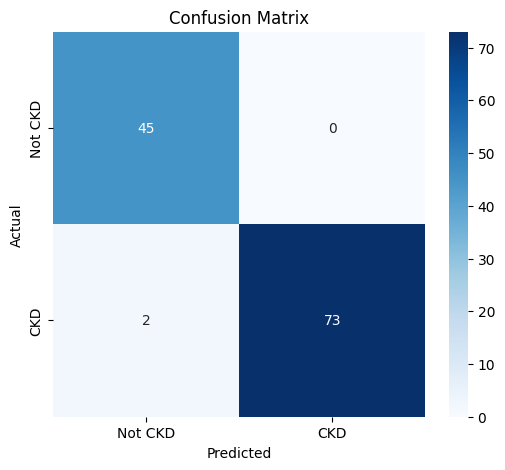

In [25]:
# Logistic Regression model
logreg_model = LogisticRegression(solver ='liblinear',random_state=42)

# Train the model on training data
logreg_model.fit(X_train, y_train)

# Predict on training data
y_train_pred = logreg_model.predict(X_train)

# Predict on test data
y_test_pred = logreg_model.predict(X_test)

# Train Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)

# Test Accuracy
lr_test_accuracy = accuracy_score(y_test, y_test_pred)

# Confusion Matrix for Test Data
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Classification Report for Test Data
class_report = classification_report(y_test, y_test_pred)

# Print the results
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {lr_test_accuracy:.4f}")
print("\nConfusion Matrix (Test Data):")
print(conf_matrix)
print("\nClassification Report (Test Data):")
print(class_report)

# Plot the Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not CKD', 'CKD'], yticklabels=['Not CKD', 'CKD'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


   Feature  Importance
14    hemo    1.671799
2       sg    1.643734
18     htn    1.388858
19      dm    1.377107
21   appet    1.197139
15     pcv    1.187697
3       al    1.013440
11      sc    0.861938
17    rbcc    0.697642
4       su    0.688865
22      pe    0.643005
1       bp    0.555836
9      bgr    0.438440
6       pc    0.411727
5      rbc    0.397797
23     ane    0.373054
7      pcc    0.242976
12     sod    0.209977
0      age    0.159700
13     pot    0.154846
10      bu    0.151355
16    wbcc    0.150182
8       ba    0.072403
20     cad    0.016279


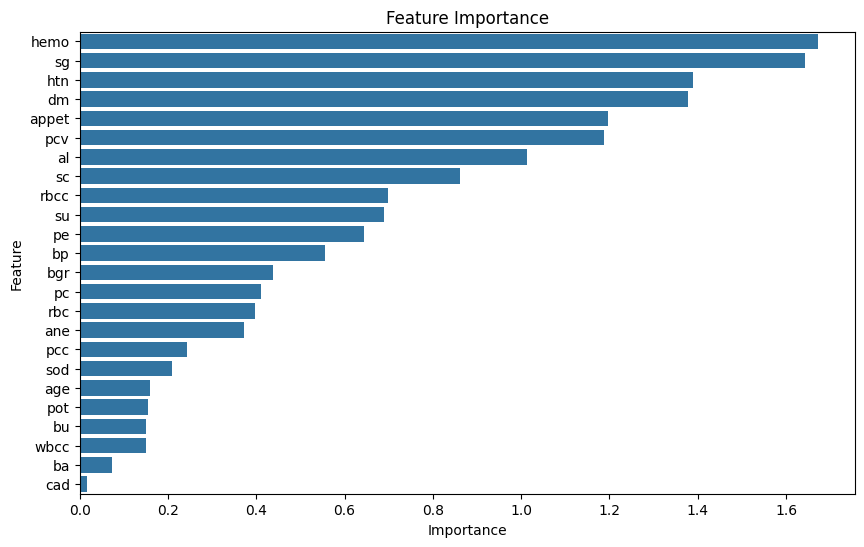

In [26]:
# Feature importance for logistic regression model
feature_importance_lr = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': np.abs(logreg_model.coef_[0])
}).sort_values(by='Importance', ascending=False)

# Display the most important features
print(feature_importance_lr)

# Plot Logistic Regression
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_lr)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [27]:
# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)

# Predict on the training data
y_train_pred = dt_classifier.predict(X_train)

# Predict on the testing data
y_test_pred = dt_classifier.predict(X_test)

# Train Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)

# Test Accuracy
dt_test_accuracy = accuracy_score(y_test, y_test_pred)

# Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Classification Report for Test Data
class_report = classification_report(y_test, y_test_pred)

# Print the results
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {dt_test_accuracy:.4f}")
print("\nConfusion Matrix (Test Data):")
print(conf_matrix)
print("\nClassification Report (Test Data):")
print(class_report)



Train Accuracy: 1.0000
Test Accuracy: 0.9583

Confusion Matrix (Test Data):
[[44  1]
 [ 4 71]]

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        45
           1       0.99      0.95      0.97        75

    accuracy                           0.96       120
   macro avg       0.95      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



Fitting 5 folds for each of 270 candidates, totalling 1350 fits
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.9857

Test Accuracy with Best Parameters: 0.9667

Confusion Matrix (Test Data):
[[45  0]
 [ 4 71]]

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        45
           1       1.00      0.95      0.97        75

    accuracy                           0.97       120
   macro avg       0.96      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



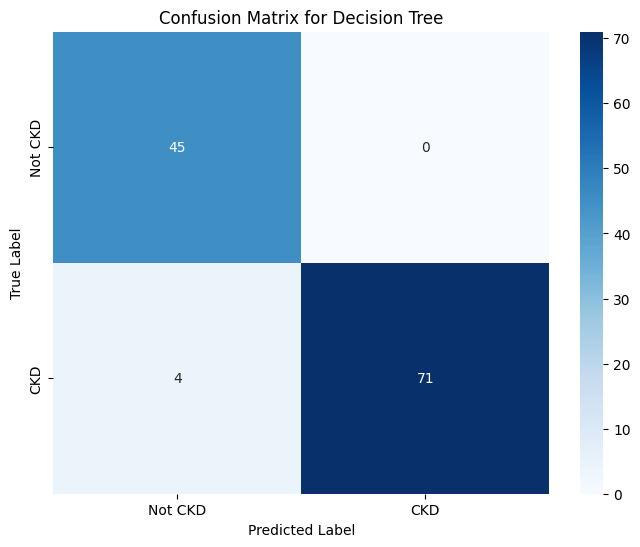

In [28]:
# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 'sqrt', 'log2']
}

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=dt_classifier,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=1,
                           n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best cross-validation score
print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")

# Evaluate the model with best parameters on the test data
best_dt_model = grid_search.best_estimator_
y_test_pred = best_dt_model.predict(X_test)

# Test Accuracy
dt_test_accuracy_bp = accuracy_score(y_test, y_test_pred)

# Confusion Matrix for Test Data
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Print the results
print(f"\nTest Accuracy with Best Parameters: {dt_test_accuracy_bp:.4f}")
print("\nConfusion Matrix (Test Data):")
print(conf_matrix)
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred))

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not CKD', 'CKD'], yticklabels=['Not CKD', 'CKD'])
plt.title("Confusion Matrix for Decision Tree")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

   Feature  Importance
14    hemo    0.719332
2       sg    0.156472
17    rbcc    0.058007
3       al    0.044869
15     pcv    0.014864
11      sc    0.006456
0      age    0.000000
22      pe    0.000000
21   appet    0.000000
20     cad    0.000000
19      dm    0.000000
18     htn    0.000000
16    wbcc    0.000000
12     sod    0.000000
13     pot    0.000000
1       bp    0.000000
10      bu    0.000000
9      bgr    0.000000
8       ba    0.000000
7      pcc    0.000000
6       pc    0.000000
5      rbc    0.000000
4       su    0.000000
23     ane    0.000000


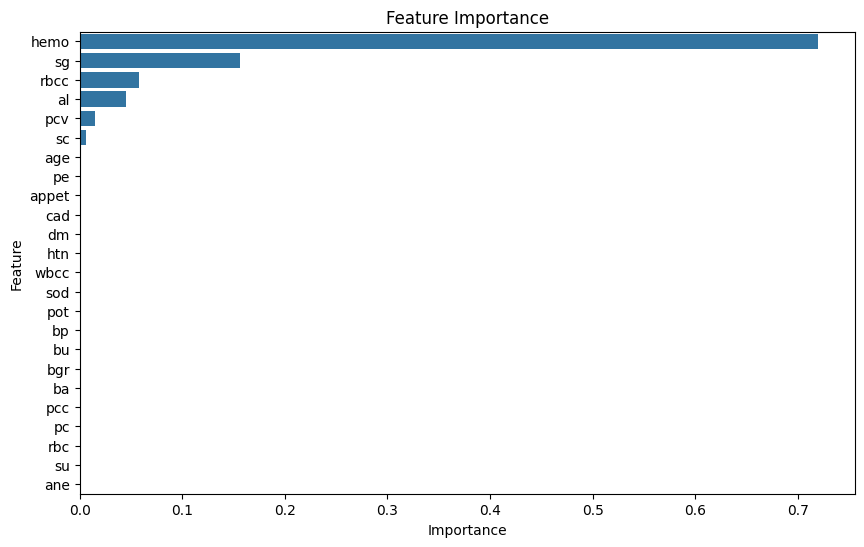

In [29]:
# Feature importance for Decision tree classifier
feature_importance_dt = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display the most important features
print(feature_importance_dt)

# Plot Decision tree classifier
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_dt)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [30]:
# The SVM(Support Vector Classifier)
svm_model = SVC(kernel = 'linear',random_state=42)

# Train the model on training data
svm_model.fit(X_train, y_train)

# Predict on training data
y_train_pred = svm_model.predict(X_train)

# Predict on test data
y_test_pred = svm_model.predict(X_test)

# Train Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)

# Test Accuracy
svm_test_accuracy = accuracy_score(y_test, y_test_pred)

# Confusion Matrix for Test Data
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Classification Report for Test Data
class_report = classification_report(y_test, y_test_pred)

# Print the results
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {svm_test_accuracy:.4f}")
print("\nConfusion Matrix (Test Data):")
print(conf_matrix)
print("\nClassification Report (Test Data):")
print(class_report)


Train Accuracy: 1.0000
Test Accuracy: 0.9667

Confusion Matrix (Test Data):
[[44  1]
 [ 3 72]]

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        45
           1       0.99      0.96      0.97        75

    accuracy                           0.97       120
   macro avg       0.96      0.97      0.96       120
weighted avg       0.97      0.97      0.97       120



Fitting 5 folds for each of 600 candidates, totalling 3000 fits
Best Hyperparameters: {'C': 1, 'class_weight': None, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.9964
Test Accuracy with Best Parameters: 0.9917

Confusion Matrix (Test Data):
[[45  0]
 [ 1 74]]

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        45
           1       1.00      0.99      0.99        75

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



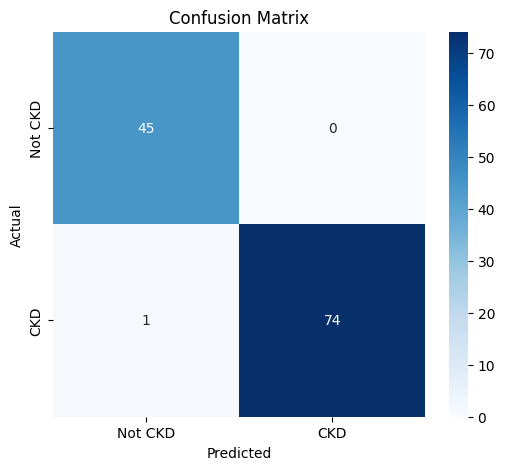

In [31]:
# Define the SVM model
svm_model = SVC(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'degree': [3, 4, 5],
    'class_weight': [None, 'balanced']
}

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=svm_model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit the grid search model
grid_search.fit(X_train, y_train)

# Best parameters and best cross-validation score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")

# Test the model with the best parameters
best_svm_model = grid_search.best_estimator_

# Predict on test data
y_test_pred = best_svm_model.predict(X_test)

# Evaluate test accuracy
svm_test_accuracy_bp = accuracy_score(y_test, y_test_pred)

# Confusion Matrix for Test Data
conf_matrix = confusion_matrix(y_test, y_test_pred)

print(f"Test Accuracy with Best Parameters: {svm_test_accuracy_bp:.4f}")
print("\nConfusion Matrix (Test Data):")
print(conf_matrix)
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred))

# Plot the Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not CKD', 'CKD'], yticklabels=['Not CKD', 'CKD'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


   Feature    Importance
2       sg  6.583333e-02
14    hemo  5.333333e-02
3       al  4.750000e-02
4       su  3.166667e-02
15     pcv  2.416667e-02
9      bgr  1.833333e-02
11      sc  1.250000e-02
10      bu  5.833333e-03
13     pot  4.166667e-03
17    rbcc  2.500000e-03
18     htn  2.500000e-03
19      dm  2.500000e-03
0      age  8.333333e-04
21   appet  1.110223e-17
20     cad  0.000000e+00
22      pe  0.000000e+00
8       ba  0.000000e+00
12     sod -8.333333e-04
7      pcc -8.333333e-04
5      rbc -8.333333e-04
23     ane -8.333333e-04
6       pc -1.666667e-03
16    wbcc -4.166667e-03
1       bp -5.833333e-03


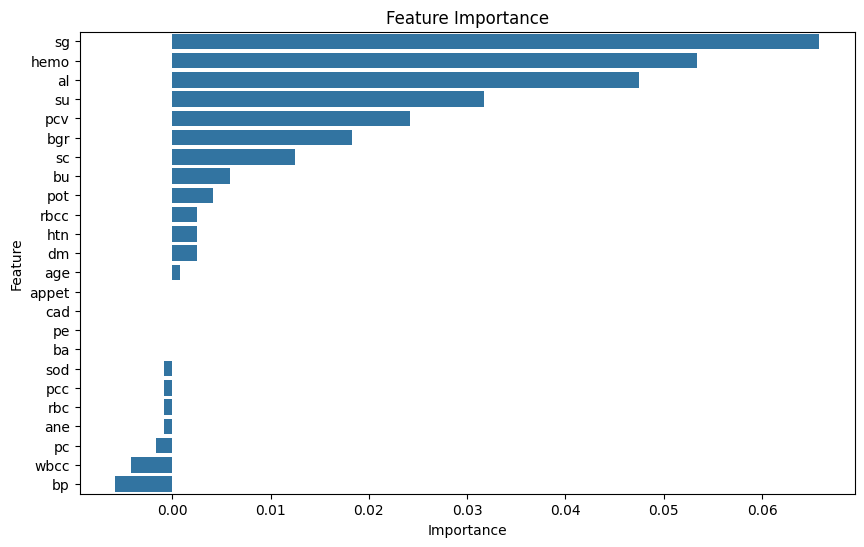

In [32]:

# Perform permutation importance
result = permutation_importance(grid_search, X_test, y_test, n_repeats=10, random_state=42)

# Get the importance of each feature
feature_importance_svm_rbf = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=False)

print(feature_importance_svm_rbf)

# Plot Decision tree classifier
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_svm_rbf)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [33]:
# Initialize the Neural Network model (MLPClassifier)
nn_model = MLPClassifier(
    hidden_layer_sizes=(50,),
    activation='relu',
    solver='adam',
    random_state=42,
    max_iter=100,
    early_stopping=True,
    n_iter_no_change=10
)

# Train the model
nn_model.fit(X_train, y_train)

# Predict on training data and test data
y_train_pred = nn_model.predict(X_train)
y_test_pred = nn_model.predict(X_test)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_train_pred)
nn_test_accuracy = accuracy_score(y_test, y_test_pred)

conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

# Print the results
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {nn_test_accuracy:.4f}")
print("\nConfusion Matrix (Test Data):")
print(conf_matrix)
print("\nClassification Report (Test Data):")
print(class_report)



Train Accuracy: 0.9036
Test Accuracy: 0.8750

Confusion Matrix (Test Data):
[[45  0]
 [15 60]]

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.75      1.00      0.86        45
           1       1.00      0.80      0.89        75

    accuracy                           0.88       120
   macro avg       0.88      0.90      0.87       120
weighted avg       0.91      0.88      0.88       120



Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best Hyperparameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'constant', 'max_iter': 100, 'solver': 'adam'}
Best Cross-Validation Accuracy: 0.9714

Test Accuracy with Best Parameters: 0.9917

Confusion Matrix (Test Data):
[[45  0]
 [ 1 74]]

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        45
           1       1.00      0.99      0.99        75

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



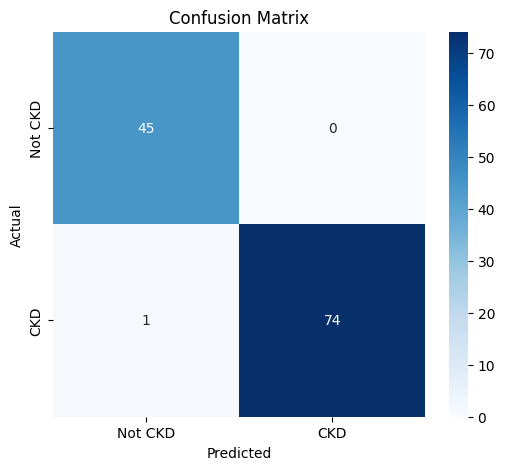

In [34]:
# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['relu', 'tanh','logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [100, 200]
}

# Initialize the MLPClassifier
nn_model = MLPClassifier(random_state=42, early_stopping=True, n_iter_no_change=10)

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(
    estimator=nn_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=2,
    n_jobs=-1
)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best cross-validation score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")

# Evaluate the model with the best parameters on the test data
best_nn_model = grid_search.best_estimator_
y_test_pred = best_nn_model.predict(X_test)

# Test Accuracy
nn_test_accuracy_bp = accuracy_score(y_test, y_test_pred)

# Confusion Matrix for Test Data
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Print results
print(f"\nTest Accuracy with Best Parameters: {nn_test_accuracy_bp:.4f}")
print("\nConfusion Matrix (Test Data):")
print(conf_matrix)
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred))

# Plot the Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not CKD', 'CKD'], yticklabels=['Not CKD', 'CKD'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


   Feature    Importance
14    hemo  7.666667e-02
3       al  7.250000e-02
15     pcv  5.833333e-02
4       su  4.083333e-02
2       sg  3.833333e-02
17    rbcc  2.500000e-02
10      bu  2.416667e-02
0      age  2.000000e-02
12     sod  1.166667e-02
1       bp  1.083333e-02
22      pe  9.166667e-03
11      sc  9.166667e-03
9      bgr  7.500000e-03
13     pot  5.833333e-03
21   appet  5.833333e-03
18     htn  3.333333e-03
5      rbc  8.333333e-04
23     ane  8.333333e-04
16    wbcc  1.110223e-17
8       ba  0.000000e+00
7      pcc  0.000000e+00
6       pc  0.000000e+00
20     cad  0.000000e+00
19      dm -8.333333e-04


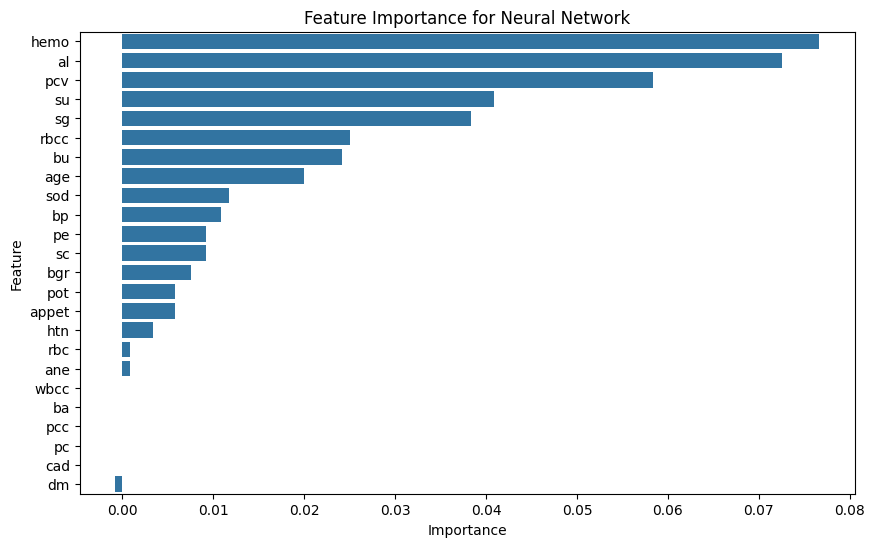

In [35]:
# Evaluate feature importance using permutation importance
perm_importance = permutation_importance(grid_search, X_test, y_test, n_repeats=10, random_state=42)

# Get feature importance from the permutation importance results
feature_importance_nn = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

# Display the most important features
print(feature_importance_nn)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_nn)
plt.title('Feature Importance for Neural Network')
plt.show()


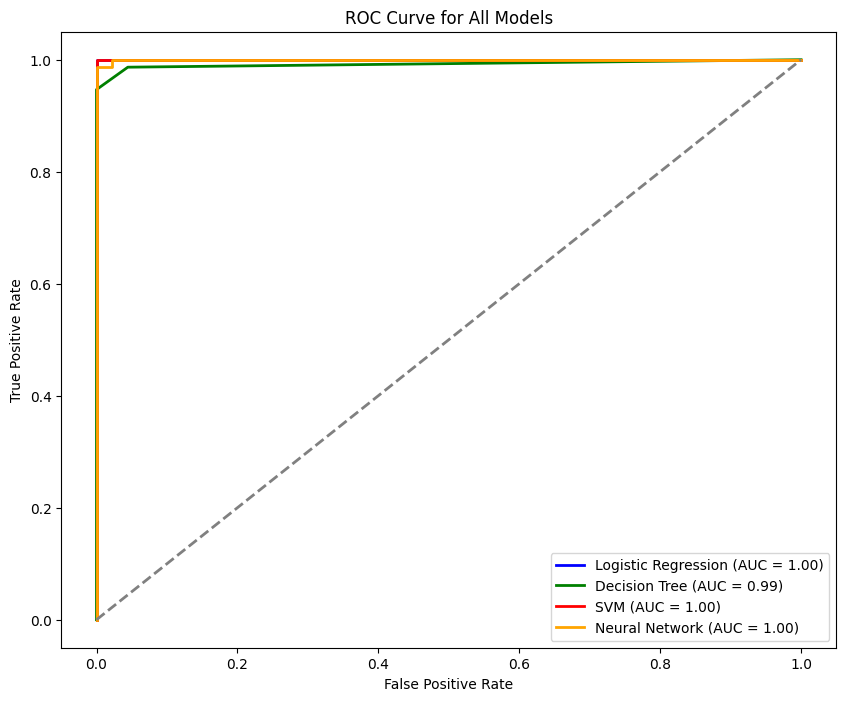

In [36]:
# Predicted probabilities for each model
# For Logistic Regression
y_train_prob_lr = logreg_model.predict_proba(X_test)[:, 1]
# For Decision Tree Classifier
y_train_prob_dt = best_dt_model.predict_proba(X_test)[:, 1]
# For SVM
y_train_prob_svm = best_svm_model.decision_function(X_test)
# For Neural Network
y_train_prob_nn = best_nn_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC for each model
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_train_prob_lr)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_train_prob_dt)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_train_prob_svm)
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_train_prob_nn)

roc_auc_lr = auc(fpr_lr, tpr_lr)
roc_auc_dt = auc(fpr_dt, tpr_dt)
roc_auc_svm = auc(fpr_svm, tpr_svm)
roc_auc_nn = auc(fpr_nn, tpr_nn)

# Plotting ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot(fpr_nn, tpr_nn, color='orange', lw=2, label=f'Neural Network (AUC = {roc_auc_nn:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for All Models')
plt.legend(loc='lower right')
plt.show()


In [37]:
# Comparison of models
models = pd.DataFrame({
    'Model' : [ 'Logistic Regression', 'Decision Tree Classifier', 'Support Vector Classifier',' Neural Network(MLPClassifier)'],
    'Score' : [lr_test_accuracy, dt_test_accuracy_bp, svm_test_accuracy_bp, nn_test_accuracy_bp]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
2,Support Vector Classifier,0.991667
3,Neural Network(MLPClassifier),0.991667
0,Logistic Regression,0.983333
1,Decision Tree Classifier,0.966667


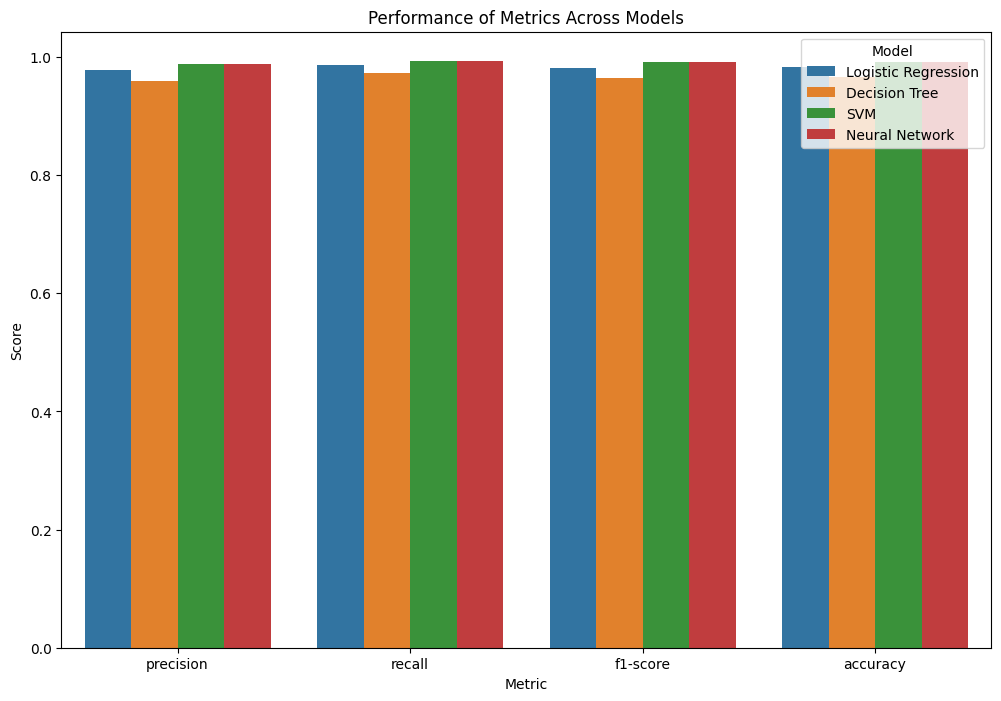

In [40]:
# Initialize a dictionary to store performance metrics
metrics_data = {
    'Model': [],
    'Metric': [],
    'Class': [],
    'Value': []
}

# Define models and their names
models = {
    'Logistic Regression': logreg_model,
    'Decision Tree': best_dt_model,
    'SVM': best_svm_model,
    'Neural Network': best_nn_model
}

# Loop through models and collect metrics
for model_name, model in models.items():
    y_test_pred = model.predict(X_test)
    report = classification_report(y_test, y_test_pred, output_dict=True)

    for class_name in ['0', '1']:
        for metric in ['precision', 'recall', 'f1-score']:
            metrics_data['Model'].append(model_name)
            metrics_data['Metric'].append(metric)
            metrics_data['Class'].append('Non-CKD' if class_name == '0' else 'CKD')
            metrics_data['Value'].append(report[class_name][metric])

    # Add accuracy as a metric
    metrics_data['Model'].append(model_name)
    metrics_data['Metric'].append('accuracy')
    metrics_data['Class'].append('Overall')
    metrics_data['Value'].append(report['accuracy'])

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics_data)

# Plot the bar graph
plt.figure(figsize=(12, 8))
sns.barplot(
    x='Metric',
    y='Value',
    hue='Model',
    data=metrics_df,
    errorbar=None
)
plt.title('Performance of Metrics Across Models')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.legend(title='Model')
plt.show()
